In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

In [2]:
movies = pd.read_csv("C:\\Users\\world\\Downloads\\archive\\movies_metadata.csv",dtype={'release_date': str},low_memory=False)
print(movies.columns)
movies.head()

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
movies.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [4]:
movies['genres']

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
45461    [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
45462                        [{'id': 18, 'name': 'Drama'}]
45463    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
45464                                                   []
45465                                                   []
Name: genres, Length: 45466, dtype: object

In [5]:
movies['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

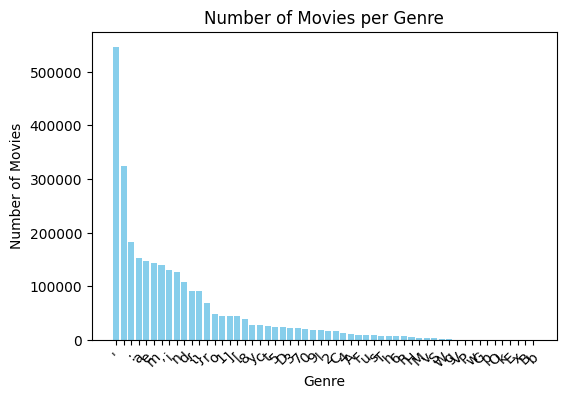

In [7]:
from collections import Counter
import matplotlib.pyplot as plt

allgenres = [genre for sublist in movies['genres'] for genre in sublist]

genre_counts = Counter(allgenres)
genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(6, 4))
plt.bar(genre_counts_df['Genre'], genre_counts_df['Count'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Genre')
plt.xticks(rotation=45)
plt.show()

The genres in Movies dataset are in a dictionary format however the type is string, So literal_eval function is used here to get the dictionary, then all that is required is to select the names of the genres.

In [ ]:
movies['genres'] = movies['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

As genres are already present, the keywords have to be obtained.

In [ ]:
keywords = pd.read_csv("C:\\Users\\world\\Downloads\\archive\\keywords.csv")

In [177]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [178]:
def clean_ids(x):
    try:
        return int(x)
    except:
        return np.nan

movies['id'] = movies['id'].apply(clean_ids)
movies = movies[movies['id'].notnull()]

In [179]:
#Joining movies and keywords dataframes
movies['id'] = movies['id'].astype('int')
keywords['id'] = keywords['id'].astype('int')

movies = movies.merge(keywords, on='id')

movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [180]:
movies["keywords"][0]

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

In [181]:
movies["keywords"] = movies["keywords"].apply(literal_eval)

In [182]:
def generate_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 10:
            names = names[:10]
        return names
    return []

movies['keywords'] = movies['keywords'].apply(generate_list)
movies['genres'] = movies['genres'].apply(lambda x: x[:10])

movies[['title', 'keywords', 'genres']].head()

,title,keywords,genres
0,Toy Story,"[jealousy, toy, boy, friendship, friends, riva...","[Animation, Comedy, Family]"
1,Jumanji,"[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"[fishing, best friend, duringcreditsstinger, o...","[Romance, Comedy]"
3,Waiting to Exhale,"[based on novel, interracial relationship, sin...","[Comedy, Drama, Romance]"
4,Father of the Bride Part II,"[baby, midlife crisis, confidence, aging, daug...",[Comedy]


Changing keywords back to string tokens to add them to the soup.

In [183]:
def sanitize(x):
    if isinstance(x, list):
        return [str.lower(i.replace(' ','')) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(' ', ''))
        else:
            return ''

for feature in ['genres', 'keywords']:
    movies[feature] = movies[feature].apply(sanitize)

In [184]:
def movie_soup(x):
    return  x["title"] + " " + " ".join(x['genres']) + " "+x['overview']+" "+" ".join(x['keywords'])

movies['overview'] = movies['overview'].fillna('')
movies['title'] = movies['title'].fillna('')
movies['soup'] = movies.apply(movie_soup, axis=1)

In [185]:
movies.loc[movies['title']=="The Matrix",'soup'].values

array(['The Matrix action sciencefiction Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth. savingtheworld artificialintelligence manvsmachine philosophy prophecy martialarts selfsacrifice fight insurgence virtualreality'],
      dtype=object)

In [186]:
books = pd.read_csv("C:\\Users\\world\\Downloads\\archive\\book_descriptions.csv", index_col=0)
print(books.columns)
books.head()

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url', 'goodreads_book_id', 'tag_name', 'description'],
      dtype='object')


,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,goodreads_book_id,tag_name,description
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,[],WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,3,"['books', 'bbc', 'books', 'every', 'man', 'sho...",Harry Potter's life is miserable. His parents ...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,41865,[],About three things I was absolutely positive.F...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,2657,"['mercenaries', 'mercenary', 'mercer', 'mayer'...",The unforgettable novel of a childhood in a sl...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,4671,[],Alternate Cover Edition ISBN: 0743273567 (ISBN...


In [187]:
books['tag_name'][1]

"['books', 'bbc', 'books', 'every', 'man', 'should', 'read', 'books', 'own', 'for', 'books', 'that', 'define', 'the', 'books', 'to', 'read', 'books', 'to', 'read', 'before', 'you', 'die', 'books', 'to', 'read', 'in', 'lifetime', 'books', 'to', 'read', 'my', 'version', 'bullets', 'children', 'books', 'essential', 'novels', 'essential', 'novels', 'poster', 'fiction', 'greatest', 'greatest', 'books', 'ever', 'written', 'greatest', 'novels', 'in', 'list', 'modern', 'library', 'must', 'read', 'books', 'must', 'read', 'books', 'the', 'essential', 'novels', 'everyone', 'should', 'read', 'recommended', 'year', 'war', 'years', 'war', 'book', 'before', 'kindergarten', 'book', 'goal', 'books', 'books', 'before', 'kindergarten', 'books', 'to', 'read', 'before', 'you', 'die', 'by', 'good', 'books', 'harry', 'novels', 'plus', 'pages', 'before', 'you', 'die', 'book', 'book', 'list', 'books', 'books', 'books', 'before', 'die', 'books', 'before', 'you', 'die', 'books', 'challenge', 'books', 'have', 're

In [188]:
#converting tag_name from string to list.
books['tag_name'] = books['tag_name'].apply(lambda x: literal_eval(x) if literal_eval(x) else np.nan)
books = books[books['description'].notnull() | books['tag_name'].notnull()]
books = books.fillna('')

In [189]:
def book_soup(x):
    soup = x["original_title"]+" "+x["description"]+" "+" ".join(x['tag_name'])+" "+x["authors"]
    return soup

In [190]:
books["soup"] = books.apply(book_soup, axis=1)

In [191]:
soups = pd.concat([movies['soup'],books['soup']],ignore_index=True)

In [192]:
count = CountVectorizer(stop_words = "english")
count.fit(soups)

movies_matrix = count.transform(movies['soup'])
books_matrix = count.transform(books['soup'])

books_matrix.shape, movies_matrix.shape

((1987, 98296), (46482, 98296))

Cosine Similiarity is used to find similiarities between vectors.

Similiarity = cos(theta) = (u.v)/(||u||.||v||)

By applying the formula, 
    -> if two vectors are identical - outcome is 1
    -> if two vectors are orthogonal - outcome is 0

In [193]:
cosine_sim = cosine_similarity(movies_matrix, books_matrix)
cosine_sim

array([[0.05783149, 0.00467059, 0.02303267, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0228486 , 0.        , ..., 0.01390768, 0.        ,
        0.05166131],
       [0.01390096, 0.        , 0.        , ..., 0.03075104, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02840446, 0.02676336, 0.0188545 , ..., 0.04188998, 0.        ,
        0.        ],
       [0.        , 0.01204227, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [194]:
movies = movies.reset_index()
indices = pd.Series(movies.index, index=movies['title'].apply(lambda x: x.lower() if x is not np.nan else "")).drop_duplicates()

In [195]:
movies.iloc[200:250,9]

200    To Wong Foo, Thanks for Everything! Julie Newmar
201                       Under Siege 2: Dark Territory
202                                     Unstrung Heroes
203                                            Unzipped
204                                A Walk in the Clouds
205                                          Waterworld
206                                  White Man's Burden
207                                           Wild Bill
208                                The Browning Version
209                                         Bushwhacked
210                                  Утомлённые солнцем
211                                     Before the Rain
212                                      Before Sunrise
213                                       Billy Madison
214                                      The Babysitter
215                                    Boys on the Side
216                                            The Cure
217                                        Castl

In [196]:
def content_recommender(title):
    if title.lower() not in indices:
        raise ValueError(f"Title '{title}' not found in the dataset")
    idx = indices[title.lower()]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    
    sim_scores = sim_scores[1:11]

    book_indices = [i[0] for i in sim_scores]

    return books.iloc[book_indices]

These are the top 10 book recommendations for the movie 'Interview with the Vampire'

In [197]:
import ipywidgets
from IPython.display import HTML
def showhtml(recommendations):
    html = ' '.join([f"""
     <div class="flip-card">
      <div class="flip-card-inner">
        <div class="flip-card-front">
          <img src="{recommendations.iloc[i]['image_url']}" alt="Avatar" style="width:300px;height:300px;">
        </div>
        <div class="flip-card-back">
          <h4>{recommendations.iloc[i]['title']}</h4>
          <p>by {recommendations.iloc[i]['authors']}</p>
        </div>
      </div>
    </div> """ for i in range(10)])
    html = "<div class='grid'>"+html+"</div>"
    html +="""<style>
    .flip-card {
      background-color: transparent;
      width: 200px;
      height: 300px;
      border: 1px solid #f1f1f1;
    }

    .flip-card-inner {
      position: relative;
      width: 100%;
      height: 100%;
      text-align: center;
      transition: transform 0.8s;
      transform-style: preserve-3d;
    }

    .flip-card:hover .flip-card-inner {
      transform: rotateY(180deg);
    }

    .flip-card-front, .flip-card-back {
      position: absolute;
      width: 100%;
      height: 100%;
      -webkit-backface-visibility: hidden; /* Safari */
      backface-visibility: hidden;
    }

    .flip-card-front {
      background-color: #bbb;
      color: black;
    }

    .flip-card-back {
    padding:10px;
      background-color: dodgerblue;
      color: white;
      transform: rotateY(180deg);
    }
    .grid {
        display: grid;
        grid-template-columns: 30% 30% 30%;
        grid-template-rows: 25% 25% 25%;
        grid-gap: 5%;
    }
    </style>"""
    return html


def show_books(movie_name='Interview with the Vampire'):
    recommendations = content_recommender(movie_name)
#     for i in range(10):
#         disPic(recommendations["image_url"].iloc[i])
#         print(recommendations["original_title"].iloc[i])
#         print(recommendations["description"].iloc[i])
    display(HTML(showhtml(recommendations)))
display(ipywidgets.interact(show_books))

interactive(children=(Text(value='Interview with the Vampire', description='movie_name'), Output()), _dom_clas…

<function __main__.show_books(movie_name='Interview with the Vampire')>